<a href="https://colab.research.google.com/github/fisicadeparticulas/20210915_procesamientodearchivoslhe-joseiban/blob/main/C%C3%81LCULO_DE_PHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CÁLCULO DEL ÁNGULO $\phi$ y $\Delta\phi$**

## **DATOS**

Leemos nuestro archivo de eventos desde *Drive*, corroboramos que los datos pueden leerse correctamente:

In [ ]:
#by:joseiban
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#NOMBRAMIENTO DE DATOS:
data=np.genfromtxt("/content/drive/MyDrive/Masa invariante Z/Eventos_pxpypzE.csv", delimiter="," , names=["px","py","pz","E"])
#LECTURA DE DATOS:
events=pd.read_csv('/content/drive/MyDrive/Masa invariante Z/Eventos_pxpypzE.csv')
#IMPRESIÓN DE DATOS:
events.head()

,px,py,pz,E
0,-25.4,35.0,86.3,96.6
1,25.4,-35.0,39.9,58.8
2,15.6,-33.5,15.3,40.0
3,-15.6,33.5,102.0,109.0
4,-12.7,16.0,112.0,114.0


Leemos nuestro archivo de eventos emparejados desde *Drive*, corroboramos que los datos pueden leerse correctamente:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#by:joseiban
events=pd.read_csv('/content/drive/MyDrive/Masa invariante Z/2 Muon.csv', delimiter="," , names=["px1","py1","pz1","E1","px2","py2","pz2","E2"])
events.head()

,px1,py1,pz1,E1,px2,py2,pz2,E2
0,px1,py1,pz1,E1,px2,py2,pz2,E2
1,-25.4,35,86.3,96.6,25.4,-35,39.9,58.8
2,15.6,-33.5,15.3,40,-15.6,33.5,102,109
3,-12.7,16,112,114,12.7,-16,-11,23.2
4,13.2,42,-19.2,48.1,-13.2,-42,-42.4,61.1


## **CÁLCULOS**

### **Momento transverso** 

Calculamos el *momento transverso*, al cual denotamos por $P_T$ tal que $P_T=\sqrt{P_x^2+P_y^2}$:

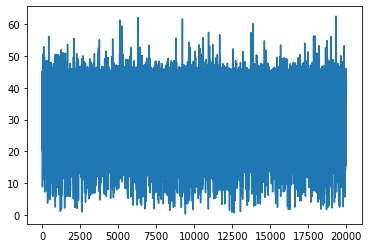

In [ ]:
#by:joseiban
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#NOMBRAMIENTO DE DATOS:
data=np.genfromtxt("/content/drive/MyDrive/Masa invariante Z/Eventos_pxpypzE.csv", delimiter="," , names=["px","py","pz","E"])
#OPERACIÓN DE SALIDA A GRÁFICA:
plt.plot(np.sqrt((data['px']**2)+(data['py']**2)))

(array([ 298.,  856., 1384., 2158., 2636., 3564., 5020., 3952.,  112.,
          20.]),
 array([ 0.30187746,  6.52984439, 12.75781133, 18.98577826, 25.2137452 ,
        31.44171213, 37.66967906, 43.897646  , 50.12561293, 56.35357987,
        62.5815468 ]),
 <a list of 10 Patch objects>)

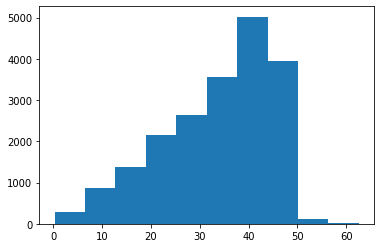

In [ ]:
#by:joseiban
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#NOMBRAMIENTO DE DATOS:
data=np.genfromtxt("/content/drive/MyDrive/Masa invariante Z/Eventos_pxpypzE.csv", delimiter="," , names=["px","py","pz","E"])
#OPERACIÓN DE SALIDA A HISTOGRAMA:
plt.hist(np.sqrt((data['px']**2)+(data['py']**2)))

### **Ángulo $\phi$**

Definimos a $\phi$ como el ángulo formado entre el eje $x>0$ y el vector $P_T$, de modo que $-\pi$ rad $\leq\phi\leq$ $\pi$ rad. Haremos uso de la función:

\begin{equation}
    \cos{\phi}=\left(\frac{P_x}{P_T}\right) ; \ \text{Dom:} \ (-\infty,\infty) \ , \ \text{Im:} \ [-1,1]
\end{equation}

transformada a:

\begin{equation}
    \phi=\arccos\left(\frac{P_x}{P_T}\right) ; \ \text{Dom:} \ [-1,1] \ , \ \text{Im:} \ [0,\pi]
\end{equation}

que podemos usar gracias a que:

\begin{gather}
    -1 \leq \frac{P_x}{\sqrt{P_x^2+P_y^2}} \leq 1 \\
    -\sqrt{P_x^2+P_y^2} \leq P_x \leq \sqrt{P_x^2+P_y^2}
\end{gather}

como $P_x^2+P_y^2>0$:

\begin{gather}
    P_x^2+P_y^2 \leq P_x^2 \leq P_x^2+P_y^2
\end{gather}

$P_x^2 \leq P_x^2+P_y^2$ es verdadera $\forall P_y \in \mathbb{R}$, ya que $P_y^2\geq0$ siempre y $P_x^2 \geq P_x^2+P_y^2$ es verdadera sólo en $P_y=0$, ya que $P_y^2\geq0$ siempre.

Usaremos esta función por encima de $\arcsin$ y $\arctan$ ya que $\arccos$ nos da valores $\phi>0$ formados entre el eje $x>0$ y $P_T$, justo como queremos. Ahora sólo nos falta hacer que el ángulo sea $\phi<0$ cuando $y<0$, de modo que:

\begin{equation}
  \phi=\left[\frac{P_y}{|P_y|}\right]\arccos{\left(\frac{P_x}{P_T}\right)}
\end{equation}

por lo que si $P_y>0$ entonces $\frac{P_y}{|P_y|}=1$ y si $P_y<0$ entonces $\frac{P_y}{|P_y|}=-1$.

### **Ángulo formado entre los momentos transversos del muón ($\mu^-$) y el antimuón ($\mu^+$), $\Delta\phi=\phi_1+\phi_2$**

Otra particularidad del $\arccos$ es que no es una función par ni impar:

\begin{align}
    \arccos(-\alpha)&\neq\arccos(\alpha) \\
    \arccos(-\alpha)&\neq-\arccos(\alpha)
\end{align}

con $\alpha>0$, sino que cumple la siguiente igualdad:

\begin{equation}
    \arccos(\alpha)=\pi-\arccos(-\alpha)
\end{equation}

Por lo que:

\begin{equation}
    \arccos(\alpha)+\arccos(-\alpha)=\pi
\end{equation}

siempre. Esta ecuación nos será útil para encontrar $\Delta\phi$, ya que $\{\arccos(\alpha),\arccos(-\alpha)\}>0$, basándonos en nuestro archivo de muones emparejados, en donde los signos dados para $P_{x1}$ y $P_{y1}$ son los opuestos para $P_{x2}$ y $P_{y2}$ respectivamente.

## **RESULTADOS**

Se muestra el resultado para el ángulo $\phi$:

(array([1990., 2024., 1966., 1993., 2027., 1986., 2027., 1965., 1994.,
        2028.]),
 array([-3.14132842e+00, -2.51309116e+00, -1.88485391e+00, -1.25661666e+00,
        -6.28379402e-01, -1.42147890e-04,  6.28095106e-01,  1.25633236e+00,
         1.88456961e+00,  2.51280687e+00,  3.14104412e+00]),
 <a list of 10 Patch objects>)

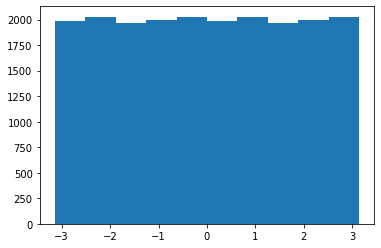

In [ ]:
#by:joseiban
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#NOMBRAMIENTO DE DATOS:
data=np.genfromtxt("/content/drive/MyDrive/Masa invariante Z/Eventos_pxpypzE.csv", delimiter="," , names=["px","py","pz","E"])
#OPERACIÓN DE SALIDA A HISTOGRAMA:
plt.hist((data['py']/np.abs(data['py']))*(np.arccos((data['px'])/(np.sqrt((data['px']**2)+(data['py']**2))))))

Se muestra el resultado para el ángulo $\Delta\phi$:

(array([    0.,     0.,     0., 10000.,     0.,     0.,     0.]),
 array([3.125, 3.13 , 3.135, 3.14 , 3.145, 3.15 , 3.155, 3.16 ]),
 <a list of 7 Patch objects>)

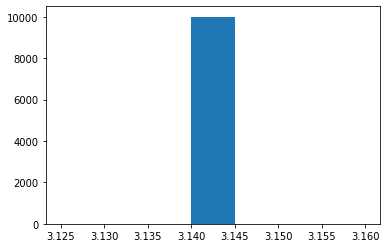

In [ ]:
#by:joseiban
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#NOMBRAMIENTO DE DATOS:
data=np.genfromtxt("/content/drive/MyDrive/Masa invariante Z/2 Muon.csv", delimiter="," , names=["px1","py1","pz1","E1","px2","py2","pz2","E2"])
#OPERACIÓN DE SALIDA A HISTOGRAMA:
plt.hist( (np.arccos((data['px1'])/(np.sqrt((data['px1']**2)+(data['py1']**2))))) + (np.arccos((data['px2'])/(np.sqrt((data['px2']**2)+(data['py2']**2))))) , bins=[3.125,3.13,3.135,3.14,3.145,3.15,3.155,3.16])

## **ANEXO**

Se muestran los comportamientos de las funciones $\arcsin$, $\arccos$ y $\arctan$, es notorio por qué obteníamos resultados extraños en los intentos anteriores:

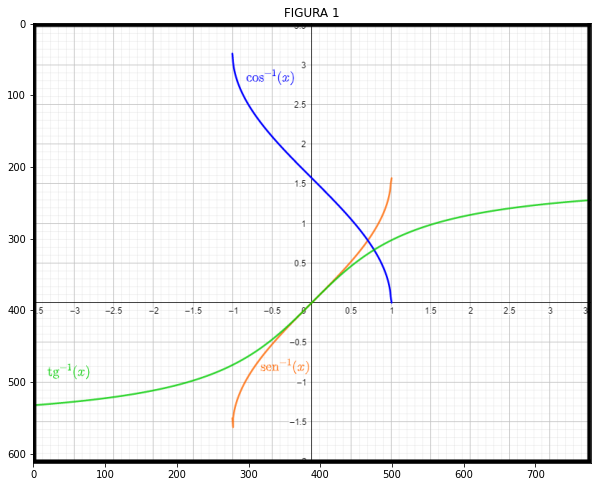

In [50]:
#FIGURA 1
import cv2
import matplotlib.pyplot as plt
FIGURA1 = cv2.imread("/content/drive/MyDrive/Masa invariante Z/arcos.PNG")
FIGURA1 = cv2.cvtColor(FIGURA1, cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(10,10))
plt.title("FIGURA 1")
plt.imshow(FIGURA1)

Se realizaron cálculos manuales para 4 eventos (FIGURA 2), con el objetivo de entender más el comportamiento de la función $\arccos$, estos eventos fueron seleccionados de manera que observamos resultados para $\phi$ en los cuatro cuadrantes cartesianos:

Cuadrante | Evento | $\phi_{\arccos}$
:---: | :---: | :---:
I $\left \{ \begin{smallmatrix} x>0 \\ y>0 \end{smallmatrix}\right.$ | 6 | 1.27 rad
II $\left \{ \begin{smallmatrix} x<0 \\ y>0 \end{smallmatrix}\right.$ | 0 | 2.2 rad
III $\left \{ \begin{smallmatrix} x<0 \\ y<0 \end{smallmatrix}\right.$ | 10 | 1.97 rad
IV $\left \{ \begin{smallmatrix} x>0 \\ y<0\end{smallmatrix}\right.$ | 2 | 1.14 rad

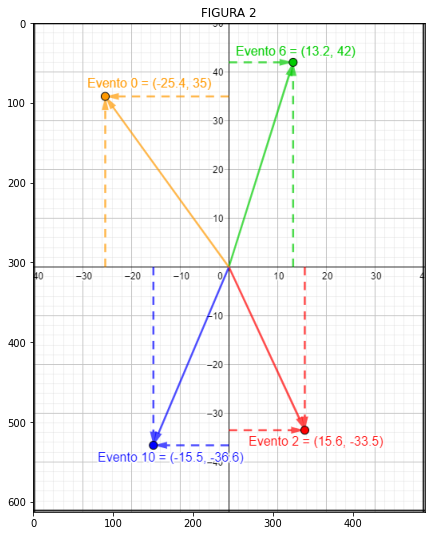

In [49]:
#FIGURA 2
import cv2
import matplotlib.pyplot as plt
FIGURA2 = cv2.imread("/content/drive/MyDrive/Masa invariante Z/g12.PNG")
FIGURA2 = cv2.cvtColor(FIGURA2, cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(9,9))
plt.title("FIGURA 2")
plt.imshow(FIGURA2)